In [244]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import  PyPDF2
from collections import Counter

设置stopwords

In [245]:
stopwords = set(STOPWORDS)|set(['Figure', 'zhang','et', 'al', 'Supporting', 'Information','Fig','two','specimen'])

Read PDF File, and obtain dict1

In [246]:

doc1 = 'AMpaper.pdf' 
pdfFileObj = open(doc1,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages

count = 0 b
text1 = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text1 += pageObj.extractText()
dict1 = WordCloud(stopwords=stopwords).generate(text1).words_.copy()


Wall time: 493 ms


In [247]:

doc2 = 'test.pdf' 
pdfFileObj = open(doc2,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages

count = 0
text2 = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text2 += pageObj.extractText()
dict2 = WordCloud(stopwords=stopwords).generate(text2).words_.copy()


Wall time: 72 ms


#Check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text
else:
   text = textract.process(fileurl, method='tesseract', language='eng')

doc = open('test.pdf','r', encoding='utf-8', errors='ignore').read()

合并dict

In [248]:
for key in list(dict1.keys()):
    dict1[key] *= 3

    
dictAll = dict(Counter(dict1)+Counter(dict2))

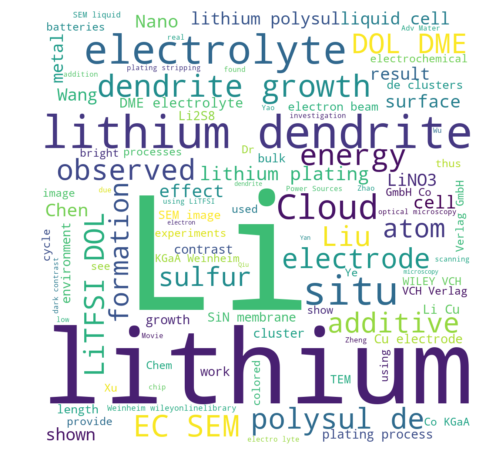

In [250]:

wc_m = WordCloud(
    background_color="white",
    width=1000,
    height=1000,
    max_words=100,
    relative_scaling=0.5,
    normalize_plurals=False
).generate_from_frequencies(dictAll)

plt.figure( figsize=(8, 8) )
plt.imshow(wc_m, interpolation='bilinear')
plt.axis('off')
plt.show()